# Pumpkin Seed Classification 

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# Reading Dataset
df = pd.read_excel(r"C:\Users\kadah\Downloads\Pumpkin_Seeds_Dataset.xlsx")

In [3]:
df.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276.0    888.242           326.1485           220.2388      56831.0   
1  76631.0   1068.146           417.1932           234.2289      77280.0   
2  71623.0   1082.987           435.8328           211.0457      72663.0   
3  66458.0    992.051           381.5638           222.5322      67118.0   
4  66107.0    998.146           383.8883           220.4545      67117.0   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2491 non-null   float64
 1   Perimeter          2487 non-null   float64
 2   Major_Axis_Length  2487 non-null   float64
 3   Minor_Axis_Length  2487 non-null   float64
 4   Convex_Area        2487 non-null   float64
 5   Equiv_Diameter     2487 non-null   float64
 6   Eccentricity       2487 non-null   float64
 7   Solidity           2487 non-null   float64
 8   Extent             2487 non-null   float64
 9   Roundness          2493 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(12), object(1)
memory usage: 254.0+ KB


In [5]:
df.describe

<bound method NDFrame.describe of          Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276.0    888.242           326.1485           220.2388      56831.0   
1     76631.0   1068.146           417.1932           234.2289      77280.0   
2     71623.0   1082.987           435.8328           211.0457      72663.0   
3     66458.0    992.051           381.5638           222.5322      67118.0   
4     66107.0    998.146           383.8883           220.4545      67117.0   
...       ...        ...                ...                ...          ...   
2495  79637.0   1224.710           533.1513                NaN      80381.0   
2496  69647.0   1084.318                NaN           191.8210      70216.0   
2497  87994.0        NaN           507.2200           222.1872      88702.0   
2498      NaN   1182.947           501.9065           204.7531      80902.0   
2499  84934.0   1159.933           462.8951           234.5597      85781.0   

      Equiv_Diame

# Exploratory Data Analysis

In [6]:
df.shape

(2500, 13)

In [7]:
df.tail()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
2495  79637.0   1224.710           533.1513                NaN      80381.0   
2496  69647.0   1084.318                NaN           191.8210      70216.0   
2497  87994.0        NaN           507.2200           222.1872      88702.0   
2498      NaN   1182.947           501.9065           204.7531      80902.0   
2499  84934.0   1159.933           462.8951           234.5597      85781.0   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
2495        318.4289        0.9340    0.9907  0.4888     0.6672   
2496        297.7874        0.9101    0.9919  0.6002     0.7444   
2497        334.7199        0.8990    0.9920  0.7643     0.7549   
2498        319.1758        0.9130    0.9890  0.7374     0.7185   
2499        328.8485        0.8621    0.9901  0.7360     0.7933   

      Aspect_Ration  Compactness          Class  
2495         2.7996       0.5973  Ürgüp Sivrisi  
2496         2.4134       0.6433  Ürgüp Sivrisi  
2497         2.2828       0.6599  Ürgüp Sivrisi  
2498         2.4513       0.6359  Ürgüp Sivrisi  
2499         1.9735       0.7104  Ürgüp Sivrisi

In [8]:
df.isnull().sum()

Area                  9
Perimeter            13
Major_Axis_Length    13
Minor_Axis_Length    13
Convex_Area          13
Equiv_Diameter       13
Eccentricity         13
Solidity             13
Extent               13
Roundness             7
Aspect_Ration         0
Compactness           0
Class                 0
dtype: int64

<Axes: >

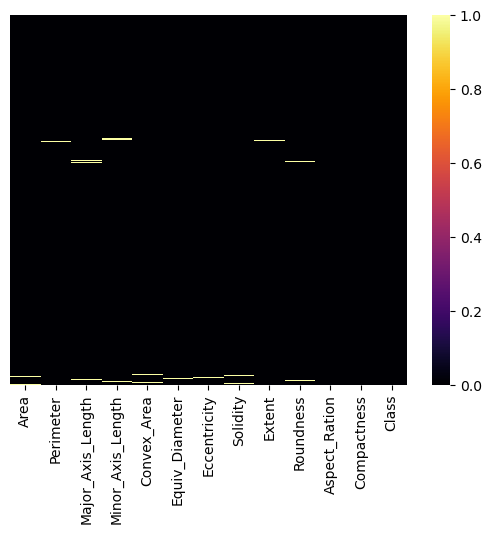

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="inferno")

In [10]:
df['Area'].fillna(df['Area'].mean(), inplace = True)
df['Perimeter'].fillna(df['Perimeter'].mean(), inplace = True)
df['Major_Axis_Length'].fillna(df['Major_Axis_Length'].mean(), inplace = True)
df['Minor_Axis_Length'].fillna(df['Minor_Axis_Length'].mean(), inplace = True)
df['Convex_Area'].fillna(df['Convex_Area'].mean(), inplace = True)
df['Equiv_Diameter'].fillna(df['Equiv_Diameter'].mean(), inplace = True)
df['Eccentricity'].fillna(df['Eccentricity'].mean(), inplace = True)
df['Solidity'].fillna(df['Solidity'].mean(), inplace = True)
df['Extent'].fillna(df['Extent'].mean(), inplace = True)
df['Roundness'].fillna(df['Roundness'].mean(), inplace = True)

In [11]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

<Axes: >

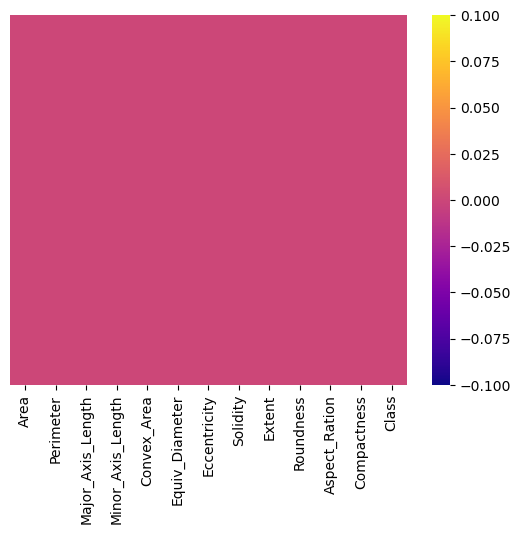

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="plasma")

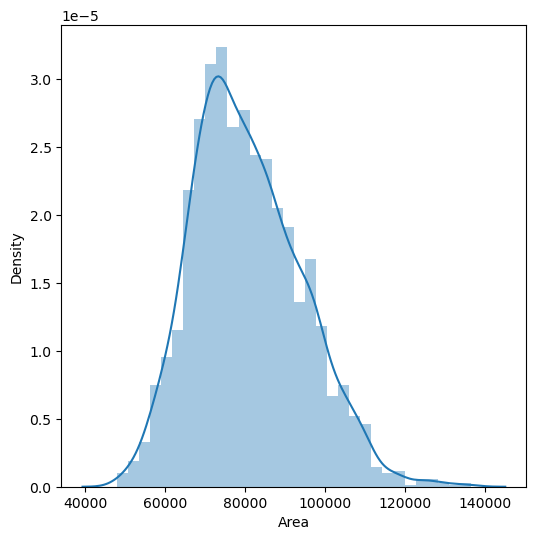

In [13]:
plt.figure(figsize=(6,6))
sns.distplot(df['Area'])
plt.show()

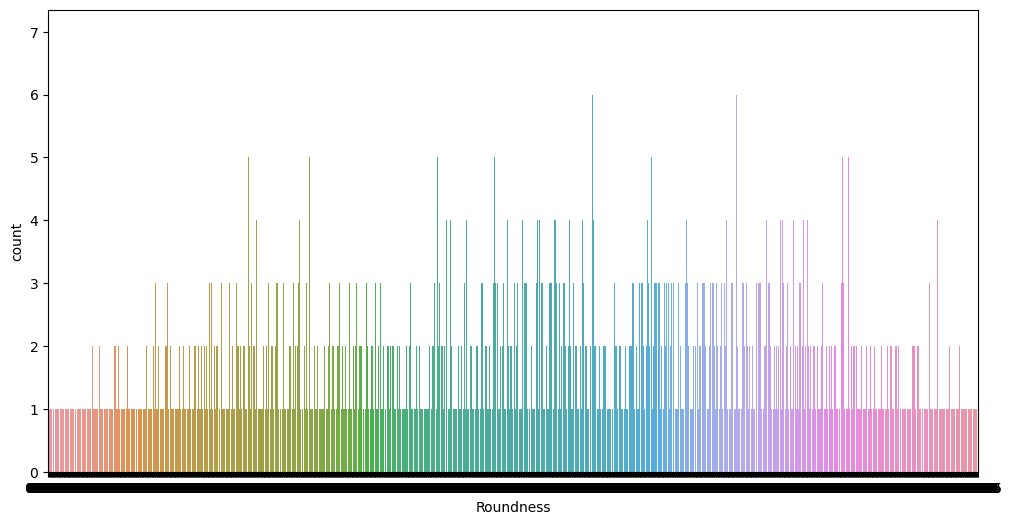

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Roundness',data=df)
plt.xticks
plt.show()

Text(0.5, 1.0, 'Countplot for the 2 Classes')

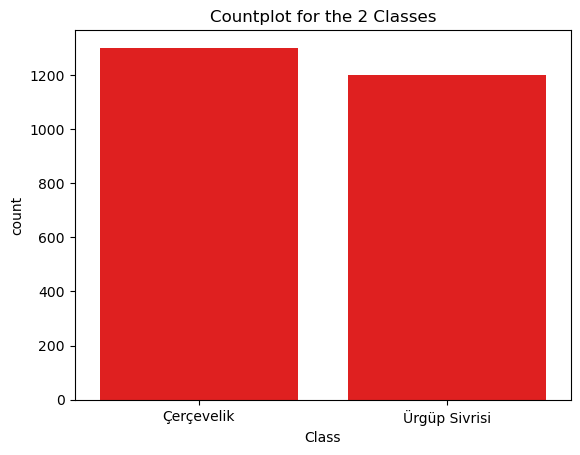

In [15]:
a = sns.countplot(x = 'Class', data = df, color = 'red')
a.set_title('Countplot for the 2 Classes')

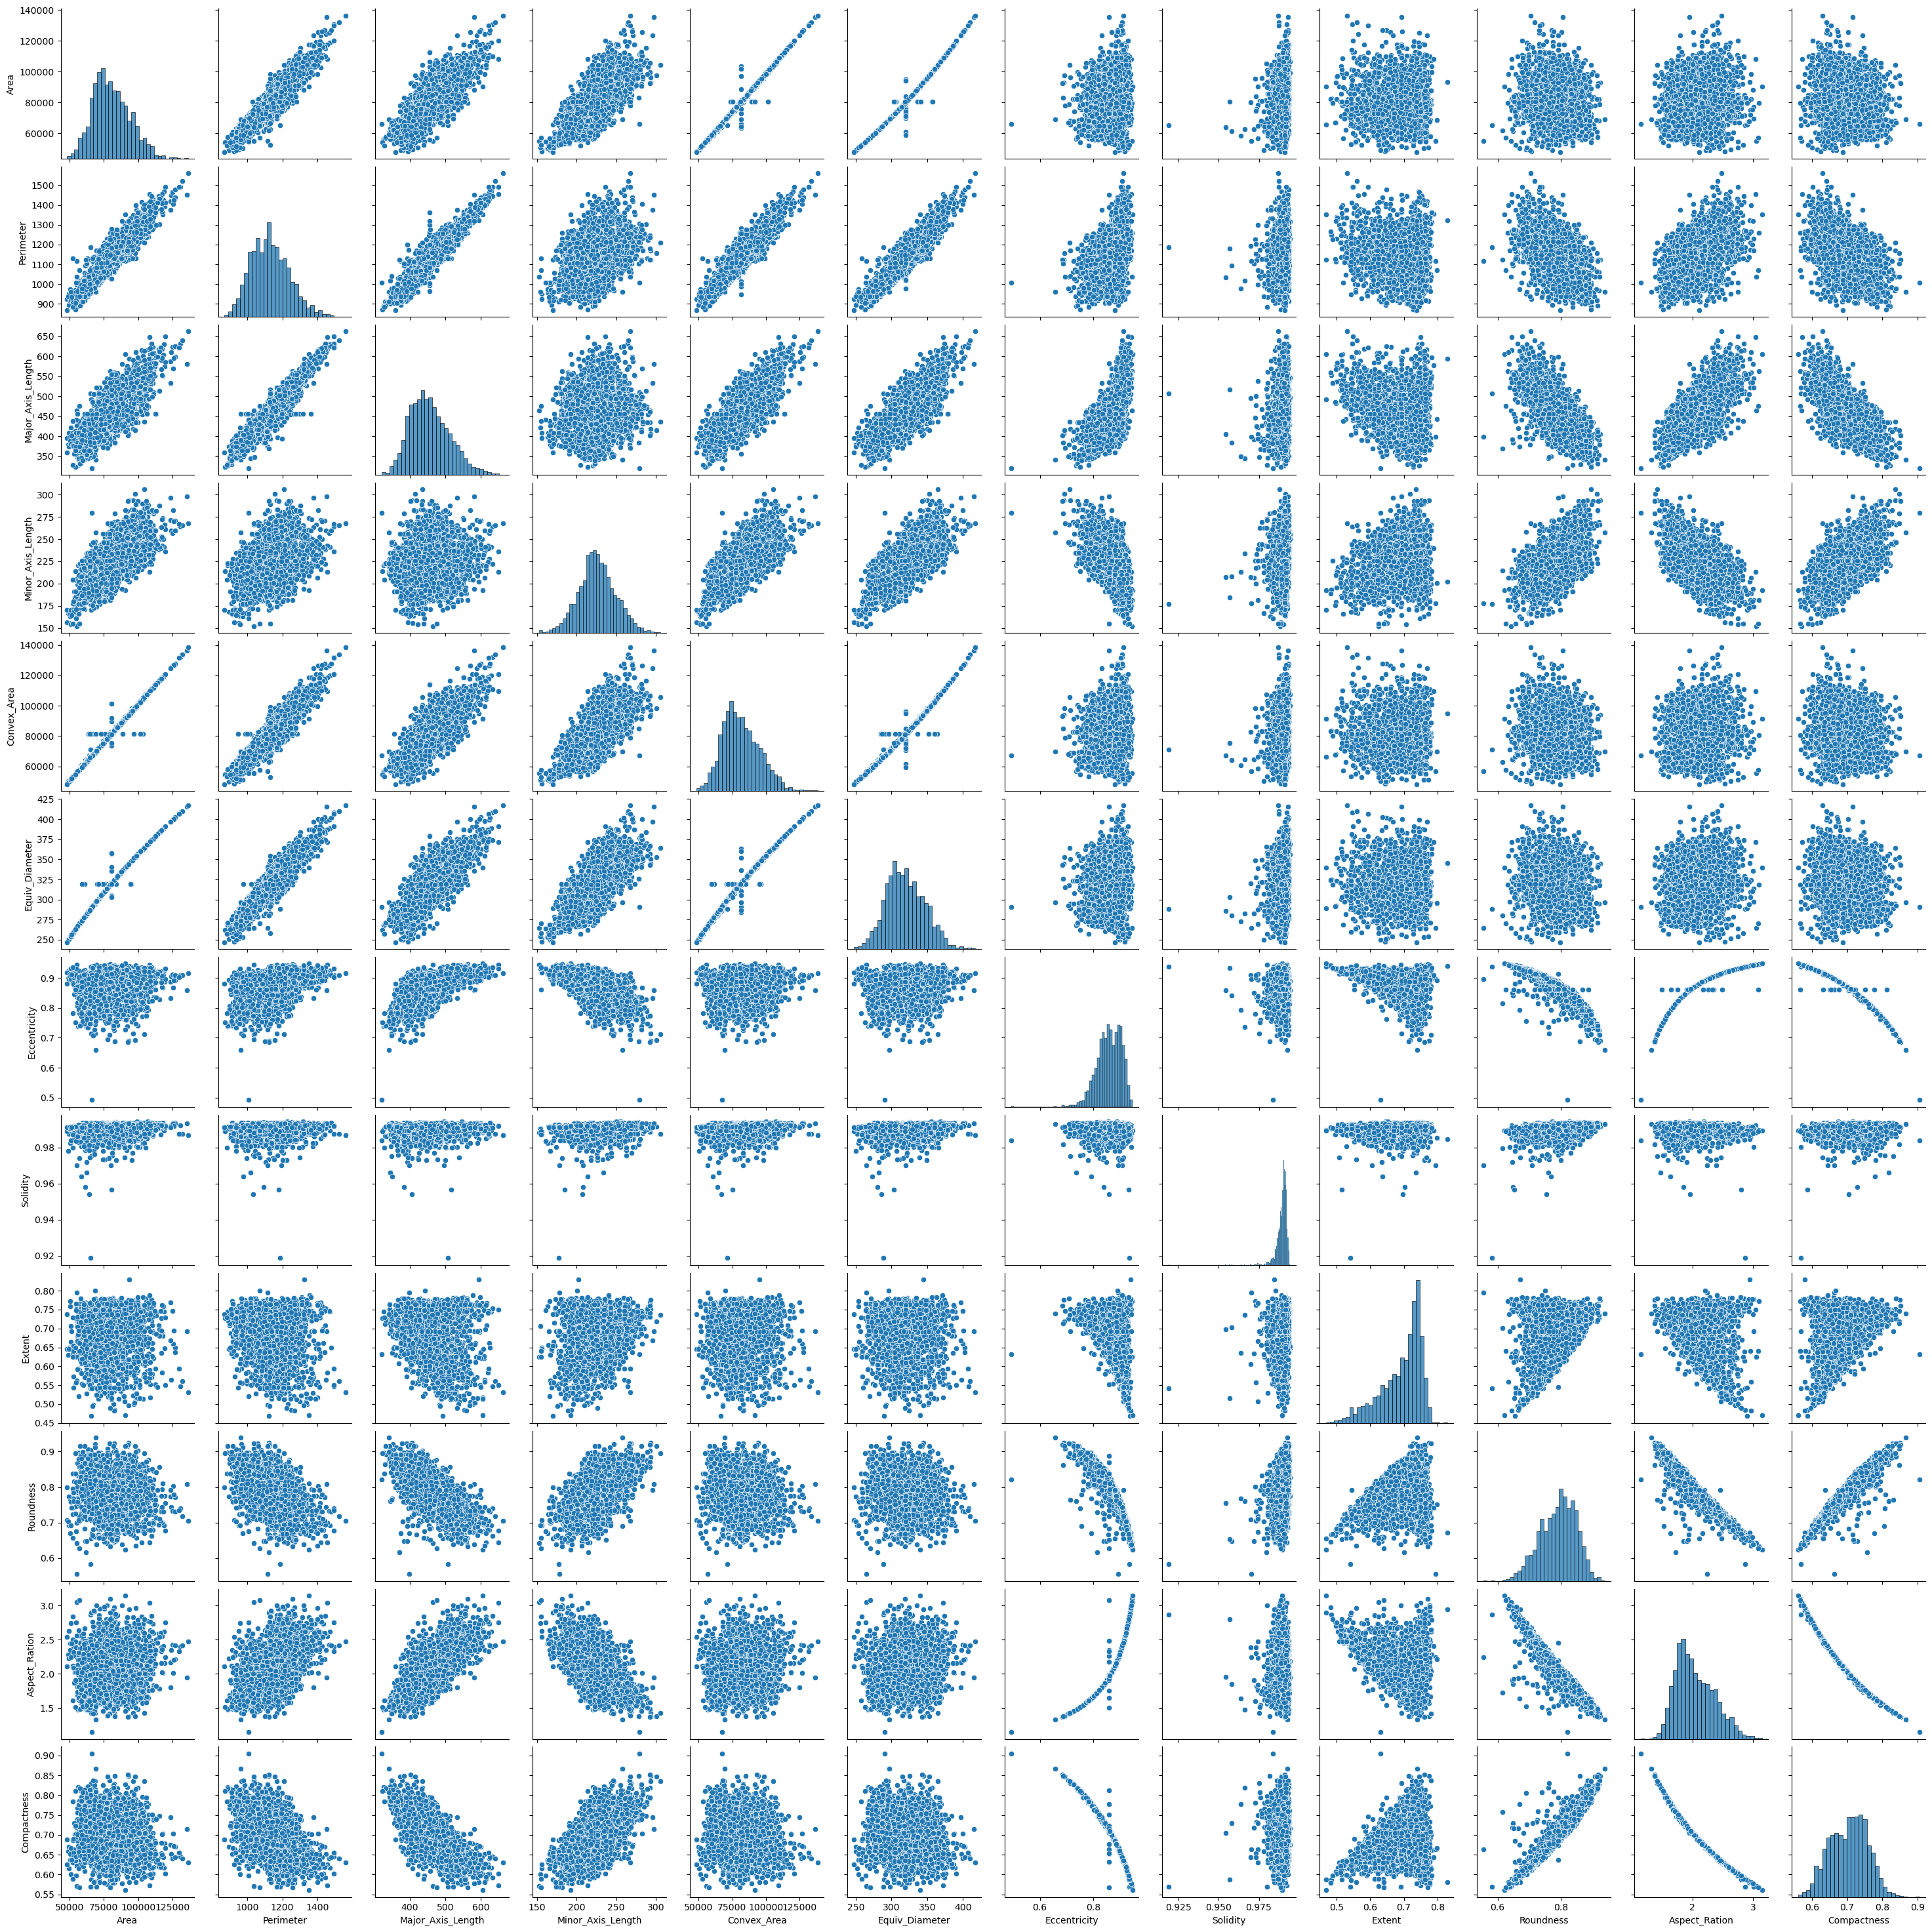

In [16]:
sns.pairplot(df)

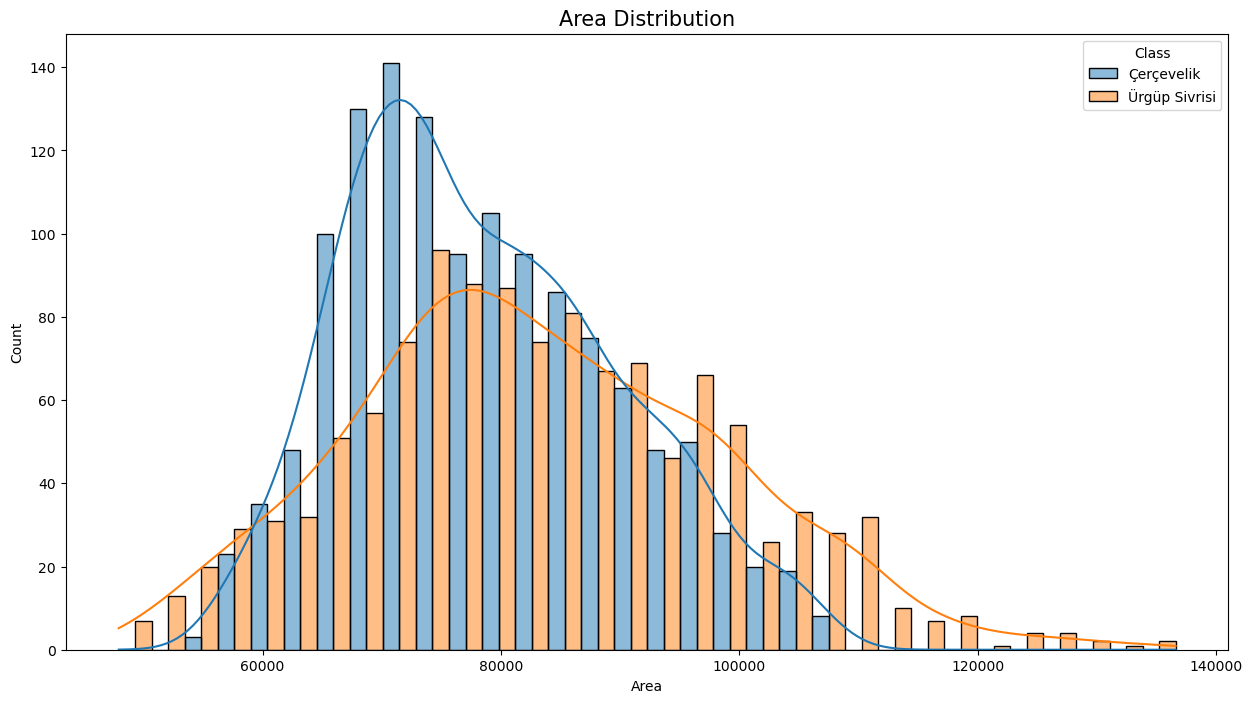

In [17]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Area', kde=True, hue='Class', multiple='dodge')
plt.title("Area Distribution", fontsize=15)
plt.show()

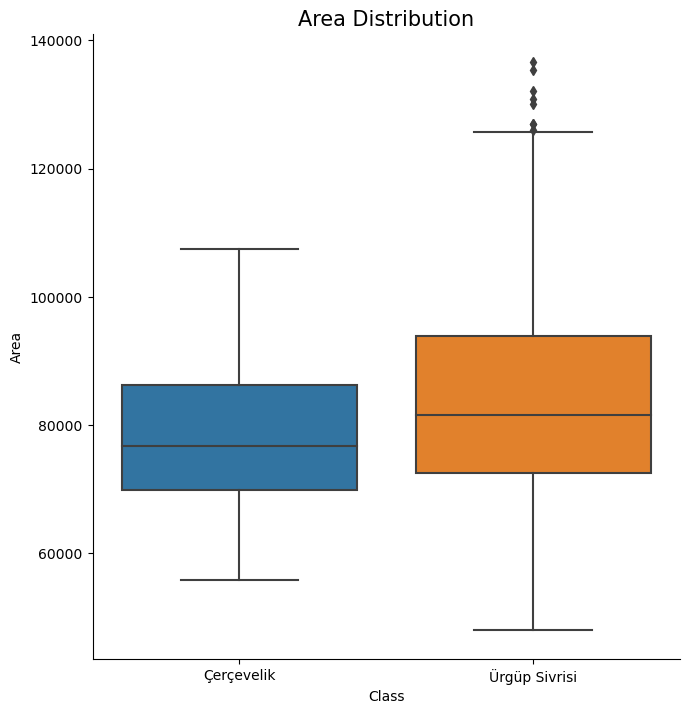

In [18]:
sns.catplot(data=df, y='Area', x='Class', kind='box', aspect=1, height=7)
plt.title("Area Distribution", fontsize=15)
plt.show()

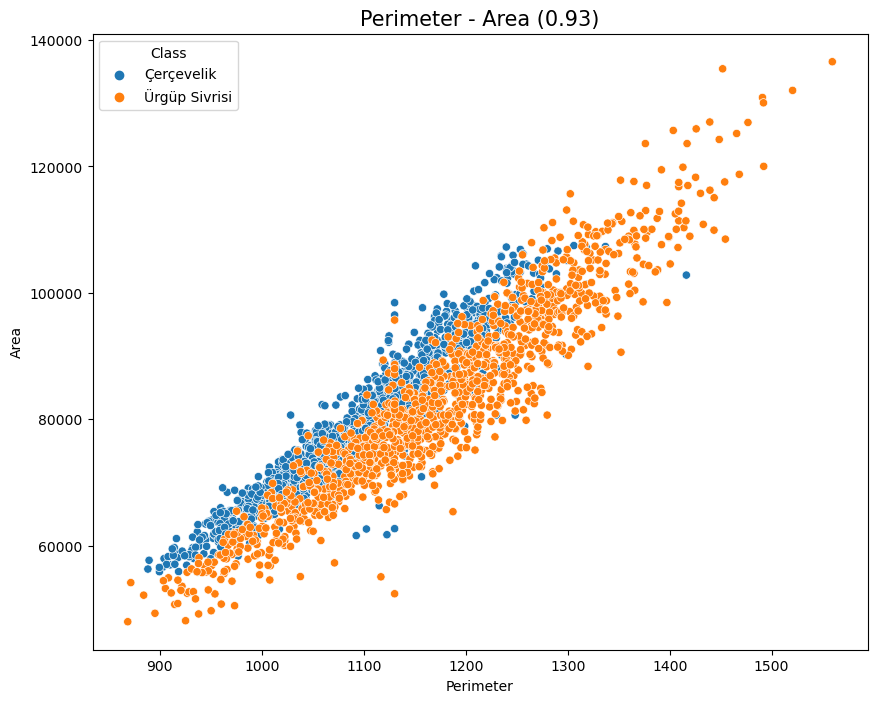

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Perimeter', y='Area', hue='Class')
plt.title("Perimeter - Area (0.93)", fontsize=15)
plt.show()

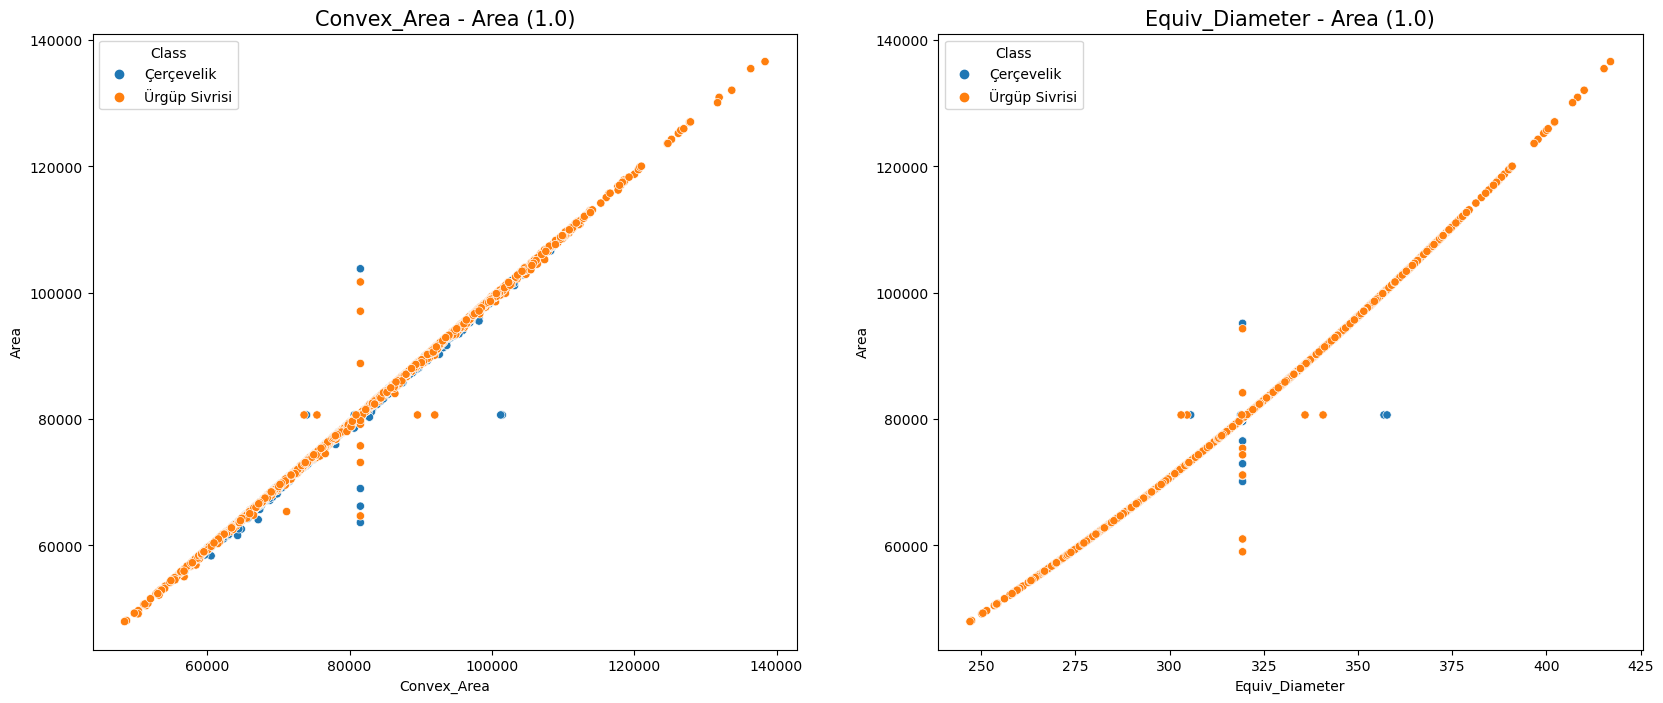

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Convex_Area', y='Area', hue='Class')
plt.title("Convex_Area - Area (1.0)", fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Equiv_Diameter', y='Area', hue='Class')
plt.title("Equiv_Diameter - Area (1.0)", fontsize=15)

plt.show()

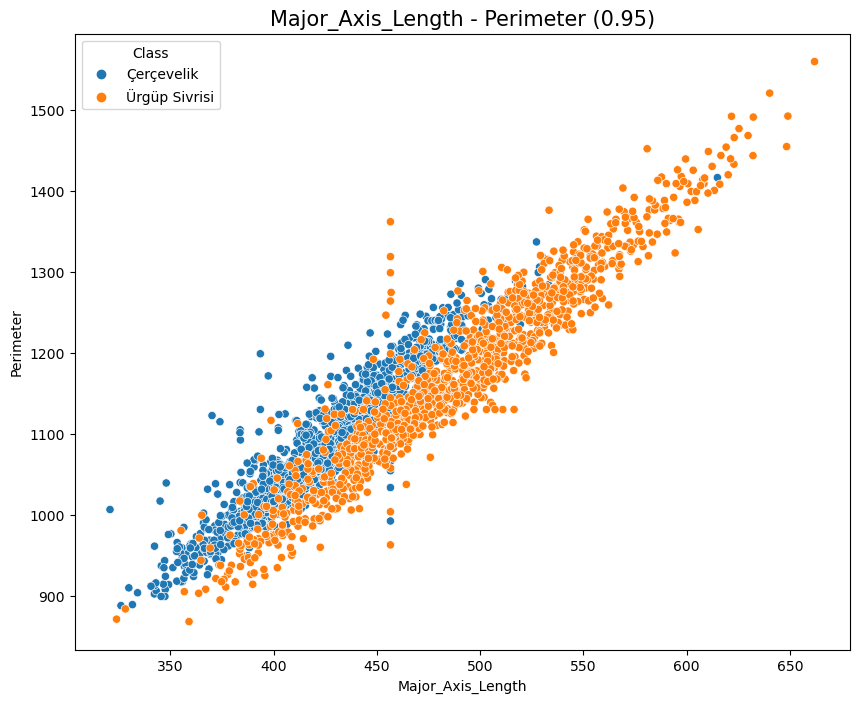

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Major_Axis_Length', y='Perimeter', hue='Class')
plt.title("Major_Axis_Length - Perimeter (0.95)", fontsize=15)
plt.show()

In [22]:
x=df.sample(10)

In [23]:
a=x.groupby("Extent")["Extent"].count()

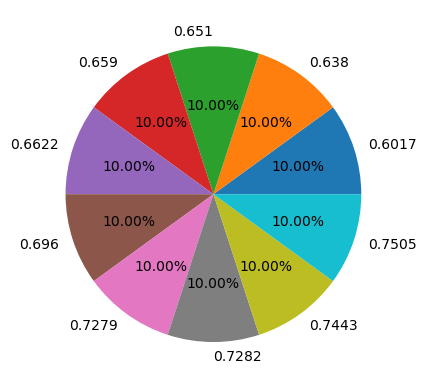

<Figure size 1500x800 with 0 Axes>

In [24]:
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.figure(figsize = (15,8))
plt.show()

<Axes: xlabel='Convex_Area', ylabel='Density'>

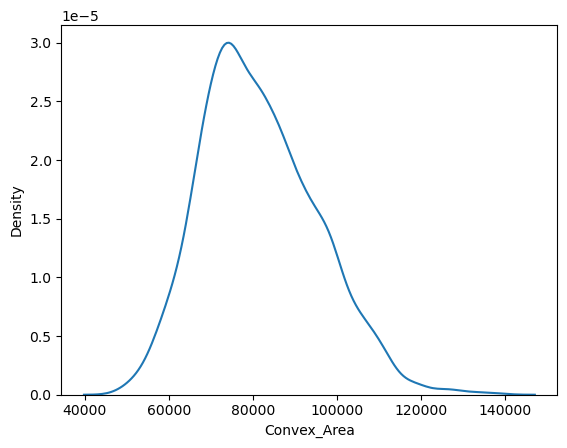

In [25]:
 sns.kdeplot(x='Convex_Area', data=df)

<Axes: xlabel='Extent', ylabel='Count'>

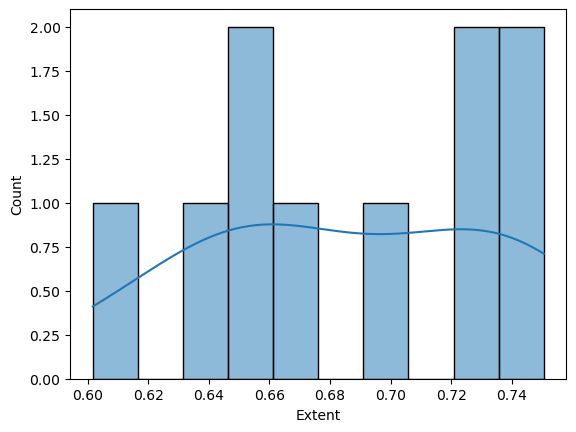

In [26]:
sns.histplot(x["Extent"],bins=10,kde=True)

In [27]:
b=df.sample(100)

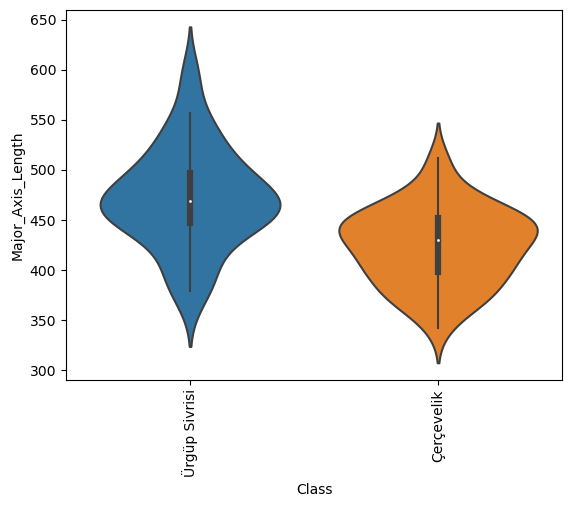

In [28]:
sns.violinplot(x="Class",y="Major_Axis_Length",data=b)
plt.xticks(rotation=90)
plt.show()

# Outlier Detections 

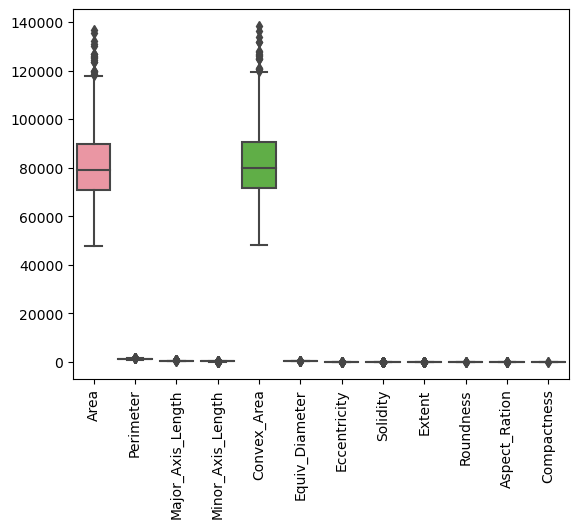

In [29]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [30]:
from scipy import stats
z_scores=stats.zscore(df["Area"])
z_scores=stats.zscore(df["Convex_Area"])
z_score_outliers=(z_scores<-3)|(z_scores>3)

In [31]:
z_score_outlier_rows=df[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:           Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
1424  123618.0   1417.026           587.8352           271.1817     124662.0   
1539  124268.0   1448.550           610.5165           259.8887     125239.0   
1583  130913.0   1490.954           632.2535           264.1584     131934.0   
1654  125214.0   1465.654           623.0155           256.4077     126196.0   
1708  126963.0   1476.738           625.3347           259.2516     127781.0   
1778  127033.0   1439.290           599.4888           270.4777     127906.0   
1854  132035.0   1520.525           640.1907           265.3734     133706.0   
1991  135455.0   1451.905           580.8759           297.7952     136373.0   
2045  136574.0   1559.450           661.9113           267.3850     138384.0   
2160  125697.0   1403.472           569.1473           282.2073     126538.0   
2289  125949.0   1425.955           595.5913           269.7864     126962.0   
2373  1300

In [32]:
df.shape

(2500, 13)

In [33]:
x=(z_scores>-3)&(z_scores<3)

In [34]:
#making a new variable df_1
df_1=df[x] 

In [35]:
print(df_1)

              Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0     56276.000000   888.242000         326.148500         220.238800   
1     76631.000000  1068.146000         417.193200         234.228900   
2     71623.000000  1082.987000         435.832800         211.045700   
3     66458.000000   992.051000         381.563800         222.532200   
4     66107.000000   998.146000         383.888300         220.454500   
...            ...          ...                ...                ...   
2495  79637.000000  1224.710000         533.151300         225.800786   
2496  69647.000000  1084.318000         456.601661         191.821000   
2497  87994.000000  1130.206055         507.220000         222.187200   
2498  80645.092332  1182.947000         501.906500         204.753100   
2499  84934.000000  1159.933000         462.895100         234.559700   

      Convex_Area  Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0         56831.0        267.6805        0.

In [36]:
df_1.shape

(2487, 13)

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
encoder = LabelEncoder()

In [38]:
df_1['Class'] = encoder.fit_transform(df_1['Class'])

In [39]:
df_1

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0     56276.000000   888.242000         326.148500         220.238800   
1     76631.000000  1068.146000         417.193200         234.228900   
2     71623.000000  1082.987000         435.832800         211.045700   
3     66458.000000   992.051000         381.563800         222.532200   
4     66107.000000   998.146000         383.888300         220.454500   
...            ...          ...                ...                ...   
2495  79637.000000  1224.710000         533.151300         225.800786   
2496  69647.000000  1084.318000         456.601661         191.821000   
2497  87994.000000  1130.206055         507.220000         222.187200   
2498  80645.092332  1182.947000         501.906500         204.753100   
2499  84934.000000  1159.933000         462.895100         234.559700   

      Convex_Area  Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0         56831.0        267.6805        0.7376    0.9902  0.7453     0.8963   
1         77280.0        312.3614        0.8275    0.9916  0.7151     0.8440   
2         72663.0        301.9822        0.8749    0.9857  0.7400     0.7674   
3         67118.0        290.8899        0.8123    0.9902  0.7396     0.8486   
4         67117.0        290.1207        0.8187    0.9850  0.6752     0.8338   
...           ...             ...           ...       ...     ...        ...   
2495      80381.0        318.4289        0.9340    0.9907  0.4888     0.6672   
2496      70216.0        297.7874        0.9101    0.9919  0.6002     0.7444   
2497      88702.0        334.7199        0.8990    0.9920  0.7643     0.7549   
2498      80902.0        319.1758        0.9130    0.9890  0.7374     0.7185   
2499      85781.0        328.8485        0.8621    0.9901  0.7360     0.7933   

      Aspect_Ration  Compactness  Class  
0            1.4809       0.8207      0  
1            1.7811       0.7487      0  
2            2.0651       0.6929      0  
3            1.7146       0.7624      0  
4            1.7413       0.7557      0  
...             ...          ...    ...  
2495         2.7996       0.5973      1  
2496         2.4134       0.6433      1  
2497         2.2828       0.6599      1  
2498         2.4513       0.6359      1  
2499         1.9735       0.7104      1  

[2487 rows x 13 columns]

# Model Building

In [40]:
x = df_1.drop('Class', axis = 1)
y = df_1['Class']

In [41]:
x.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

In [42]:
# correlation plot
corr = x.corr()
corr.style.background_gradient('coolwarm')


In [43]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [44]:
print(x.shape,x_train.shape, x_test.shape)

(2487, 12) (1989, 12) (498, 12)


In [45]:
from sklearn.svm import SVC
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
svcm = SVC(kernel = 'linear')

In [47]:
svcm.fit(x_train, y_train)

SVC(kernel='linear')

In [48]:
y_pred = svcm.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(y_test, y_pred)

In [50]:
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 89.56%


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       246
           1       0.93      0.86      0.89       252

    accuracy                           0.90       498
   macro avg       0.90      0.90      0.90       498
weighted avg       0.90      0.90      0.90       498



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(y_test, y_pred)

In [54]:
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[229  17]
 [ 35 217]]


In [55]:
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

True Positives(TP) =  229
True Negatives(TN) =  217
False Positives(FP) =  17
False Negatives(FN) =  35


<Axes: >

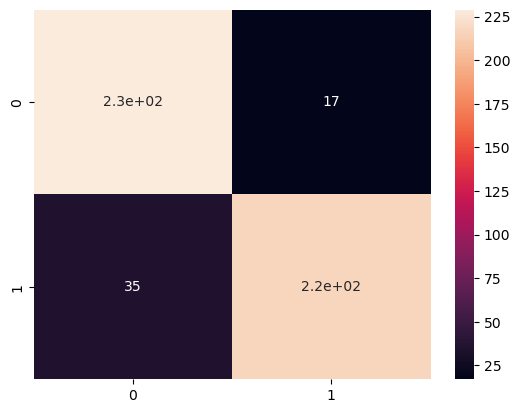

In [56]:
sns.heatmap(cm,annot=True)

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [58]:
yb = label_binarize(y, classes=[0,1])

In [59]:
nc = yb.shape[1]

In [60]:
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,random_state=42))

In [61]:
y_score = classifier.fit(x_train, y_train).decision_function(x_test)

In [62]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nc):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

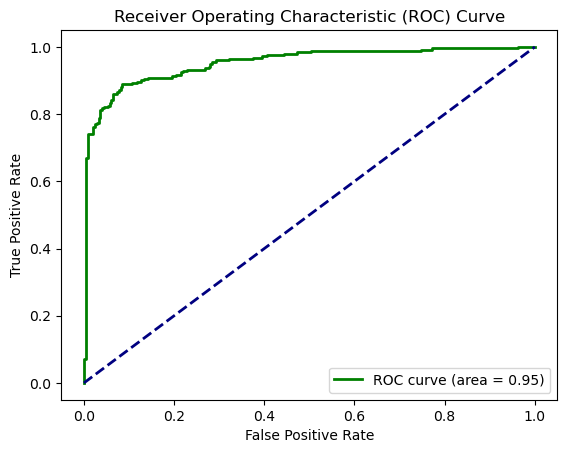

In [63]:
# Calculate the overall ROC AUC score by averaging values from the roc_auc dictionary
overall_roc_auc = sum(roc_auc.values()) / len(roc_auc)

# Modify the label to include the overall ROC AUC score
plt.plot(fpr[0], tpr[0], color='green', lw=2, label='ROC curve (area = {:.2f})'.format(overall_roc_auc))
plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [64]:
 linear_svc = SVC(kernel='linear')

In [65]:
 linear_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [66]:
y_predLinear = linear_svc.predict(x_test)

In [67]:
acc = accuracy_score(y_test, y_predLinear)
print("Accuracy Score with Linear Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Linear Kernel : 89.56%


In [68]:
print(classification_report(y_test, y_predLinear))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       246
           1       0.93      0.86      0.89       252

    accuracy                           0.90       498
   macro avg       0.90      0.90      0.90       498
weighted avg       0.90      0.90      0.90       498



In [69]:
cm = confusion_matrix(y_test, y_predLinear)
print('Confusion matrix : ')
print(cm)
print('True Positive(TP) = ', cm[0,0])
print('True Negative(TN) = ', cm[1,1])
print('False Positive(FP) = ', cm[0,1])
print('False Negative(FN) = ', cm[1,0])

Confusion matrix : 
[[229  17]
 [ 35 217]]
True Positive(TP) =  229
True Negative(TN) =  217
False Positive(FP) =  17
False Negative(FN) =  35


<Axes: >

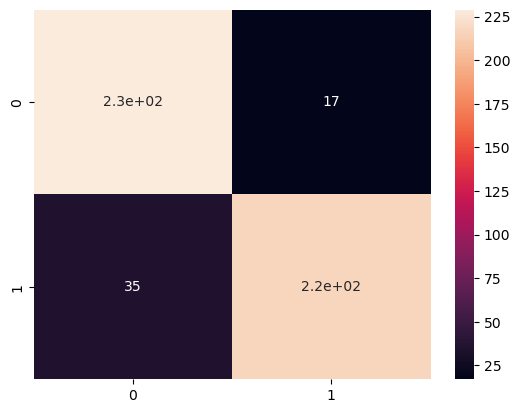

In [70]:
 sns.heatmap(cm, annot=True)

# SVM with RBF Kernel

In [71]:
rbf_svc = SVC(kernel='rbf')

In [72]:
rbf_svc.fit(x_train, y_train)

SVC()

In [73]:
y_predRBF = rbf_svc.predict(x_test)

In [74]:
acc = accuracy_score(y_test, y_predRBF)
print("Accuracy Score with RBF Kernel : {:.2f}%". format(acc*100))


Accuracy Score with RBF Kernel : 89.96%


In [75]:
print(classification_report(y_test, y_predRBF))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       246
           1       0.94      0.86      0.90       252

    accuracy                           0.90       498
   macro avg       0.90      0.90      0.90       498
weighted avg       0.90      0.90      0.90       498



In [76]:
cm = confusion_matrix(y_test, y_predRBF)
print('Confusion matrix : ')
print(cm)
print('True Positive(TP) = ', cm[0,0])
print('True Negative(TN) = ', cm[1,1])
print('False Positive(FP) = ', cm[0,1])
print('False Negative(FN) = ', cm[1,0])

Confusion matrix : 
[[231  15]
 [ 35 217]]
True Positive(TP) =  231
True Negative(TN) =  217
False Positive(FP) =  15
False Negative(FN) =  35


<Axes: >

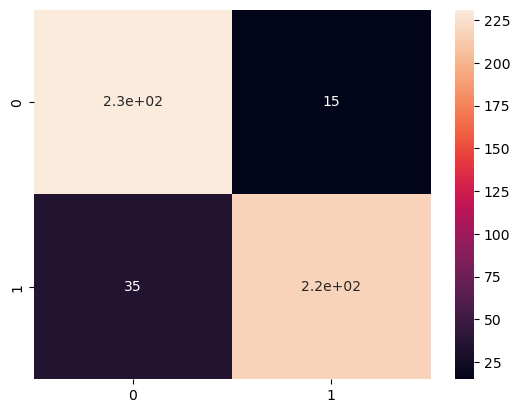

In [77]:
sns.heatmap(cm, annot=True)

# SVM with Sigmoid Kernel

In [78]:
sigmoid_svc = SVC(kernel='sigmoid')

In [79]:
sigmoid_svc.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [80]:
y_predsigmoid = sigmoid_svc.predict(x_test)

In [81]:
acc = accuracy_score(y_test, y_predsigmoid)
print("Accuracy Score with Sigmoid Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Sigmoid Kernel : 79.12%


In [82]:
cm = confusion_matrix(y_test, y_predsigmoid)
print('Confusion matrix : ')
print(cm)
print('True Positive(TP) = ', cm[0,0])
print('True Negative(TN) = ', cm[1,1])
print('False Positive(FP) = ', cm[0,1])
print('False Negative(FN) = ', cm[1,0])

Confusion matrix : 
[[201  45]
 [ 59 193]]
True Positive(TP) =  201
True Negative(TN) =  193
False Positive(FP) =  45
False Negative(FN) =  59


<Axes: >

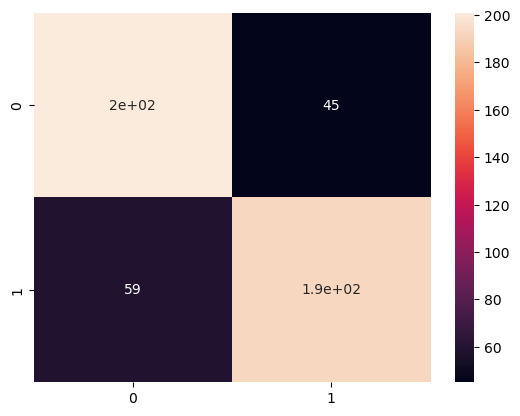

In [83]:
sns.heatmap(cm, annot=True)

# SVM with Polynomial Kernel

In [84]:
poly_svc = SVC(kernel='poly')

In [85]:
poly_svc.fit(x_train, y_train)

SVC(kernel='poly')

In [86]:
y_predPoly = poly_svc.predict(x_test)

In [87]:
acc = accuracy_score(y_test, y_predPoly)
print("Accuracy Score with Polynomial Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Polynomial Kernel : 85.54%


In [88]:
print(classification_report(y_test, y_predPoly))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       246
           1       0.97      0.73      0.84       252

    accuracy                           0.86       498
   macro avg       0.88      0.86      0.85       498
weighted avg       0.88      0.86      0.85       498



In [89]:
cm = confusion_matrix(y_test, y_predPoly)
print('Confusion matrix : ')
print(cm)
print('True Positive(TP) = ', cm[0,0])
print('True Negative(TN) = ', cm[1,1])
print('False Positive(FP) = ', cm[0,1])
print('False Negative(FN) = ', cm[1,0])

Confusion matrix : 
[[241   5]
 [ 67 185]]
True Positive(TP) =  241
True Negative(TN) =  185
False Positive(FP) =  5
False Negative(FN) =  67


<Axes: >

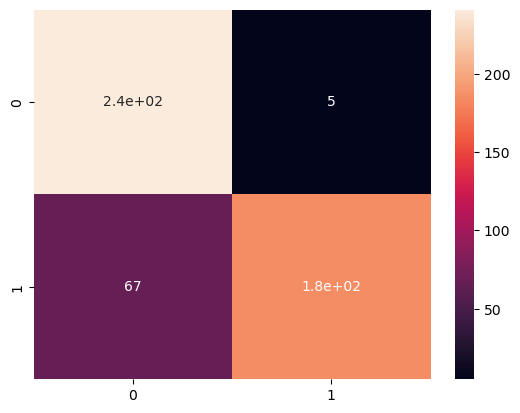

In [90]:
sns.heatmap(cm, annot=True)

# Grid Search

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [92]:
param_grid = {
'C' : [0.1, 1, 10, 100],
'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}


In [93]:
svcm = SVC()

In [94]:
grid_search = GridSearchCV(svcm, param_grid, cv=5)

In [95]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [96]:
best_param = grid_search.best_params_
print("Best hyperparameter : ", best_param)

Best hyperparameter :  {'C': 1, 'kernel': 'rbf'}


In [97]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [98]:
best_svm.fit(x_train, y_train)

SVC(C=1)

In [99]:
y_pred = best_svm.predict(x_test)

In [100]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy after Grid Search : {:.2f}%". format(acc * 100))

Accuracy after Grid Search : 89.96%


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       246
           1       0.94      0.86      0.90       252

    accuracy                           0.90       498
   macro avg       0.90      0.90      0.90       498
weighted avg       0.90      0.90      0.90       498



In [102]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positive(TP) = ', cm[0,0])
print('True Negative(TN) = ', cm[1,1])
print('False Positive(FP) = ', cm[0,1])
print('False Negative(FN) = ', cm[1,0])


Confusion matrix : 
[[231  15]
 [ 35 217]]
True Positive(TP) =  231
True Negative(TN) =  217
False Positive(FP) =  15
False Negative(FN) =  35


<Axes: >

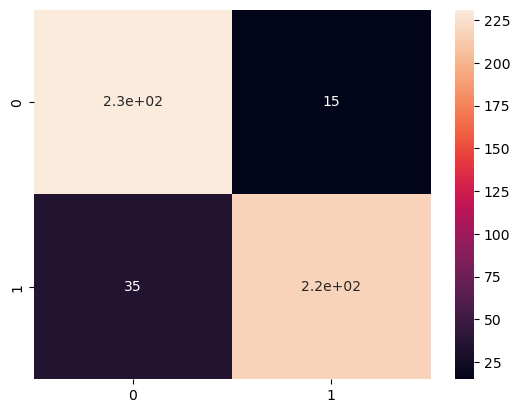

In [103]:
sns.heatmap(cm, annot=True)

# Random Search

In [104]:
param_grid = {
'C' : [0.1, 1, 10, 100],
'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [105]:
svcm = SVC()

In [106]:
random_search = RandomizedSearchCV(svcm, param_grid, cv=5)

In [107]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [108]:
best_param = random_search.best_params_
print("Best Parameter : ", best_param)

Best Parameter :  {'kernel': 'rbf', 'C': 1}


In [109]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [110]:
best_svm.fit(x_train, y_train)

SVC(C=1)

In [111]:
y_pred = best_svm.predict(x_test)

In [112]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy after Randomized Search: {:.2f}%" . format(acc * 100))

Accuracy after Randomized Search: 89.96%


In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       246
           1       0.94      0.86      0.90       252

    accuracy                           0.90       498
   macro avg       0.90      0.90      0.90       498
weighted avg       0.90      0.90      0.90       498



In [114]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positive(TP) = ', cm[0,0])
print('True Negative(TN) = ', cm[1,1])
print('False Positive(FP) = ', cm[0,1])
print('False Negative(FN) = ', cm[1,0])

Confusion matrix : 
[[231  15]
 [ 35 217]]
True Positive(TP) =  231
True Negative(TN) =  217
False Positive(FP) =  15
False Negative(FN) =  35


<Axes: >

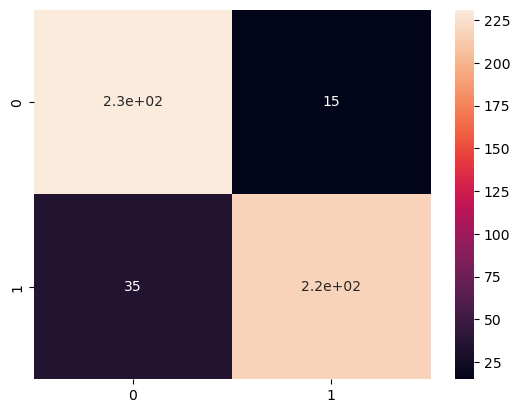

In [115]:
sns.heatmap(cm, annot=True)

In [116]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn import model_selection, naive_bayes, metrics,feature_extraction

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [119]:
bayes = naive_bayes.MultinomialNB()

In [120]:
bayes.fit(x_train,y_train)

MultinomialNB()

In [121]:
y_pred_nb=bayes.predict(x_test)

In [122]:
acc = metrics.accuracy_score(y_test, y_pred_nb)
print("Accuracy after Randomized Search: {:.2f}%" . format(acc * 100))

Accuracy after Randomized Search: 82.32%


In [123]:
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       328
           1       0.90      0.70      0.79       294

    accuracy                           0.82       622
   macro avg       0.84      0.82      0.82       622
weighted avg       0.84      0.82      0.82       622



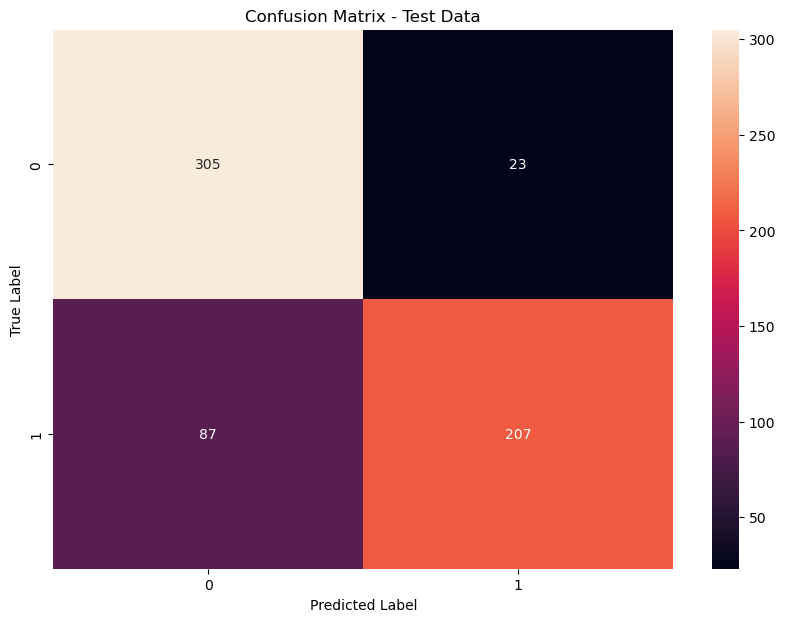

In [124]:
cm=confusion_matrix(y_test,y_pred_nb)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Naive Bayes Gridsearch

In [125]:
from sklearn import model_selection, naive_bayes, svm, metrics,feature_extraction

In [126]:
param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}

In [127]:
bayes = naive_bayes.MultinomialNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [128]:
best_param = grid_search.best_params_
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [129]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 0.1, 'fit_prior': False}


In [130]:
acc = metrics.accuracy_score(y_test, y_pred_nb)
print("Accuracy after Randomized Search: {:.2f}%" . format(acc * 100))

Accuracy after Randomized Search: 82.32%


In [131]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       328
           1       0.83      0.76      0.79       294

    accuracy                           0.81       622
   macro avg       0.81      0.81      0.81       622
weighted avg       0.81      0.81      0.81       622



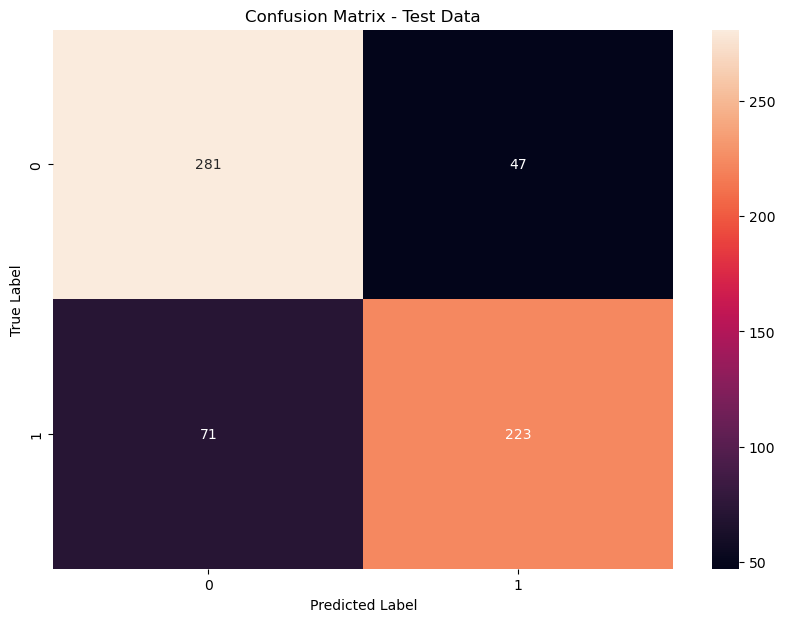

In [132]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Text(0, 0.5, 'True Positive Rate')

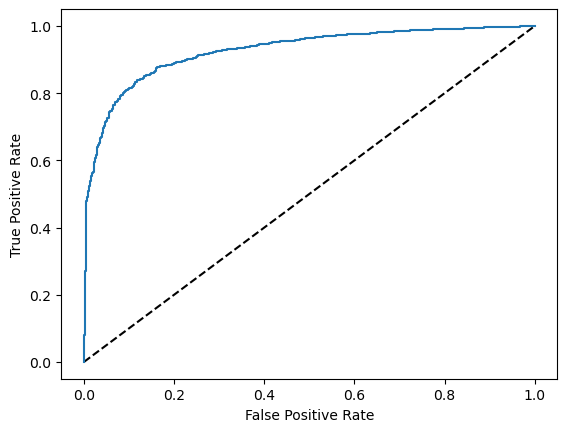

In [133]:
roc = best_nb.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, roc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Naive Bayes Randomized Search

In [134]:
param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}

In [135]:
bayes = naive_bayes.MultinomialNB()

In [136]:
random_search = RandomizedSearchCV(bayes, param_grid, cv=5)

In [137]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': [0.1, 1, 10, 100],
                                        'fit_prior': [True, False]})

In [138]:
best_param = random_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'fit_prior': False, 'alpha': 0.1}


In [139]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior =best_param['fit_prior'])

In [140]:
best_nb.fit(x_train, y_train)

MultinomialNB(alpha=0.1, fit_prior=False)

In [141]:
y_pred = best_nb.predict(x_test)

In [142]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score after Randomized Search : {:.2f}%". format(acc*100))

Accuracy Score after Randomized Search : 81.03%


In [143]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       328
           1       0.83      0.76      0.79       294

    accuracy                           0.81       622
   macro avg       0.81      0.81      0.81       622
weighted avg       0.81      0.81      0.81       622



In [144]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positive(TP) = ', cm[0,0])
print('True Negative(TN) = ', cm[1,1])
print('False Positive(FP) = ', cm[0,1])
print('False Negative(FN) = ', cm[1,0])

Confusion matrix : 
[[281  47]
 [ 71 223]]
True Positive(TP) =  281
True Negative(TN) =  223
False Positive(FP) =  47
False Negative(FN) =  71


<Axes: >

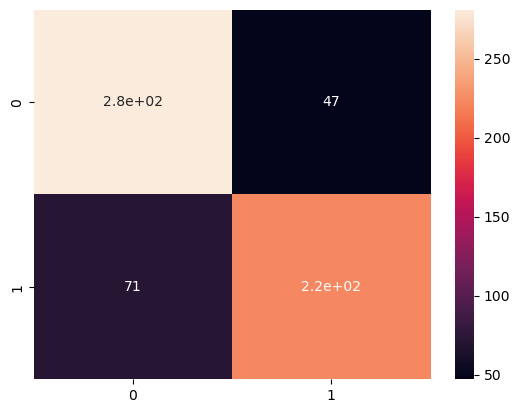

In [145]:
sns.heatmap(cm, annot=True)

Text(0, 0.5, 'True Positive Rate')

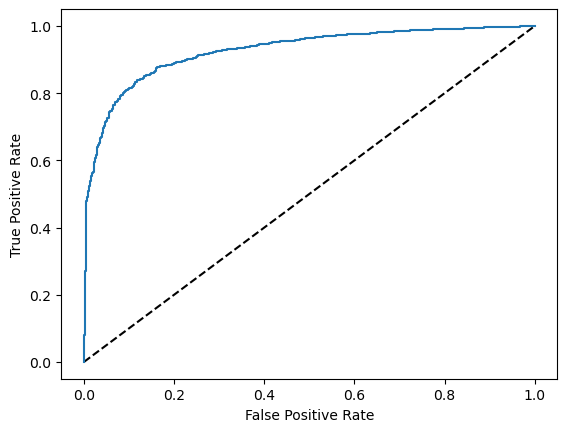

In [146]:
roc = best_nb.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, roc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')